In [23]:
import os
import pandas as pd
from tbparse import SummaryReader
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = Path().resolve().parent / "lightning_logs" / "thread_the_needle"
log_dirs = [str(base_dir / d) for d in os.listdir(base_dir) if os.path.isdir(base_dir / d)]

scalars = []

for log_dir in log_dirs:
    reader = SummaryReader(log_dir)
    df = reader.scalars
    scalars.append(df)

# Merge all runs by step
merged_df = pd.concat(scalars).groupby(["tag", "step"], as_index=False).mean()
merged_df['step'] = merged_df['step'] * 2048
merged_df = merged_df.pivot(index="step", columns="tag", values="value")

# # Save or visualize the averaged data
# merged_df.to_csv("averaged_logs.csv", index=False)


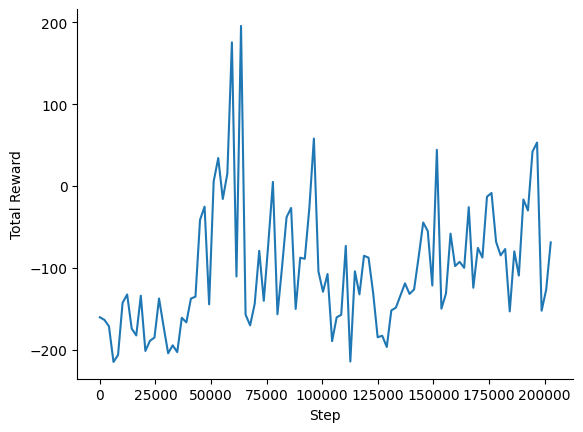

In [24]:
merged_df['train/total_reward'].plot()
plt.xlabel('Step')
plt.ylabel('Total Reward')
sns.despine()